### Israel coordinates - not Kruskal. 

![alt text](img/kruskal.png "Kruskal Coordinates. Note r is implicit")


implicit coordinates are hard to work with - instead use Israel
https://www.researchgate.net/profile/Venkateswararao_Alapati/post/What_exactly_is_conformal_time/attachment/59d623ca79197b8077982191/AS:309157637361664@1450720332265/download/PhysRev.164.1776.pdf



In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy.solvers import solve
from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, ChristoffelSymbols, RiemannCurvatureTensor

sympy.init_printing()

### Israel coords
![alt-text](img/israel-paper2.png "real thing")


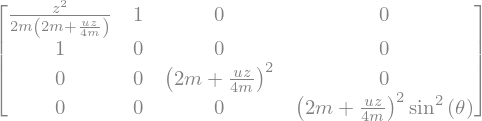

In [2]:
syms = sympy.symbols("u z theta phi")
r, m = sympy.symbols("r, m")

r = 2*m + syms[0]*syms[1]/(4*m)

# using metric values of schwarschild space-time
# a is schwarzschild radius
# note: to convert off diagonal metric signature to tensor, divide by 2
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = (syms[1]**2/(2*m*r))
list2d[0][1] = 1
list2d[1][0] = 1
list2d[1][1] = 0 
list2d[2][2] =r**2
list2d[3][3] = r**2*(sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


### Calculating the Einstein Tensor (with both indices covariant)

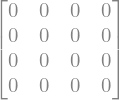

In [3]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

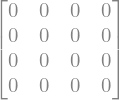

In [4]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

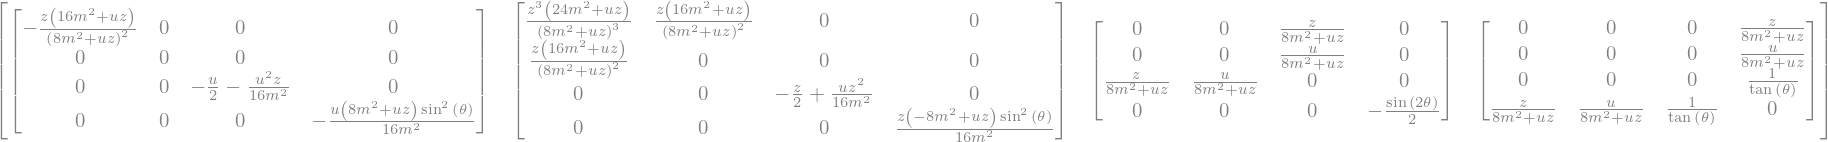

In [5]:
chS = ChristoffelSymbols.from_metric(sch)
chS.simplify()
chS.tensor()



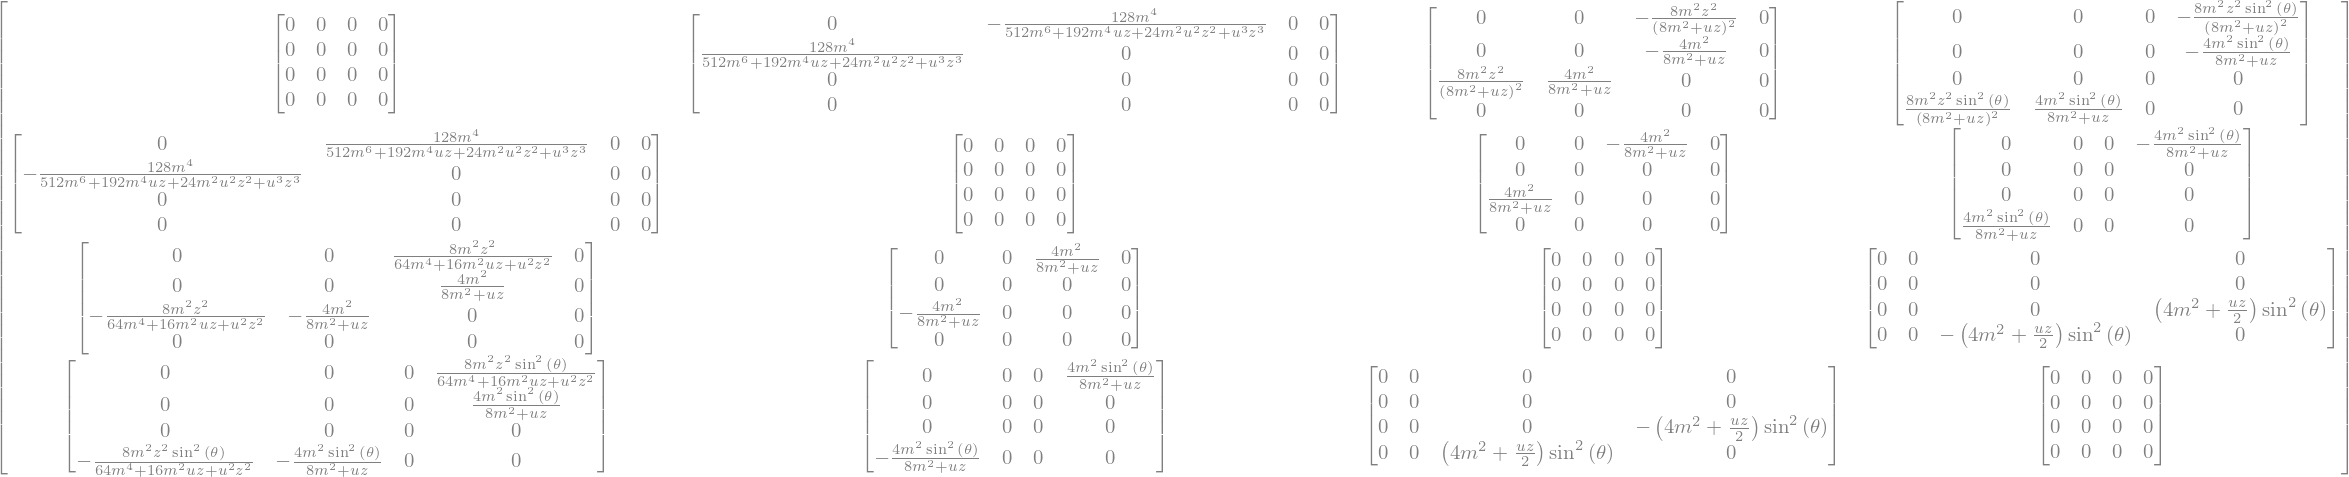

In [6]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.simplify()
weyl.tensor() # all components!

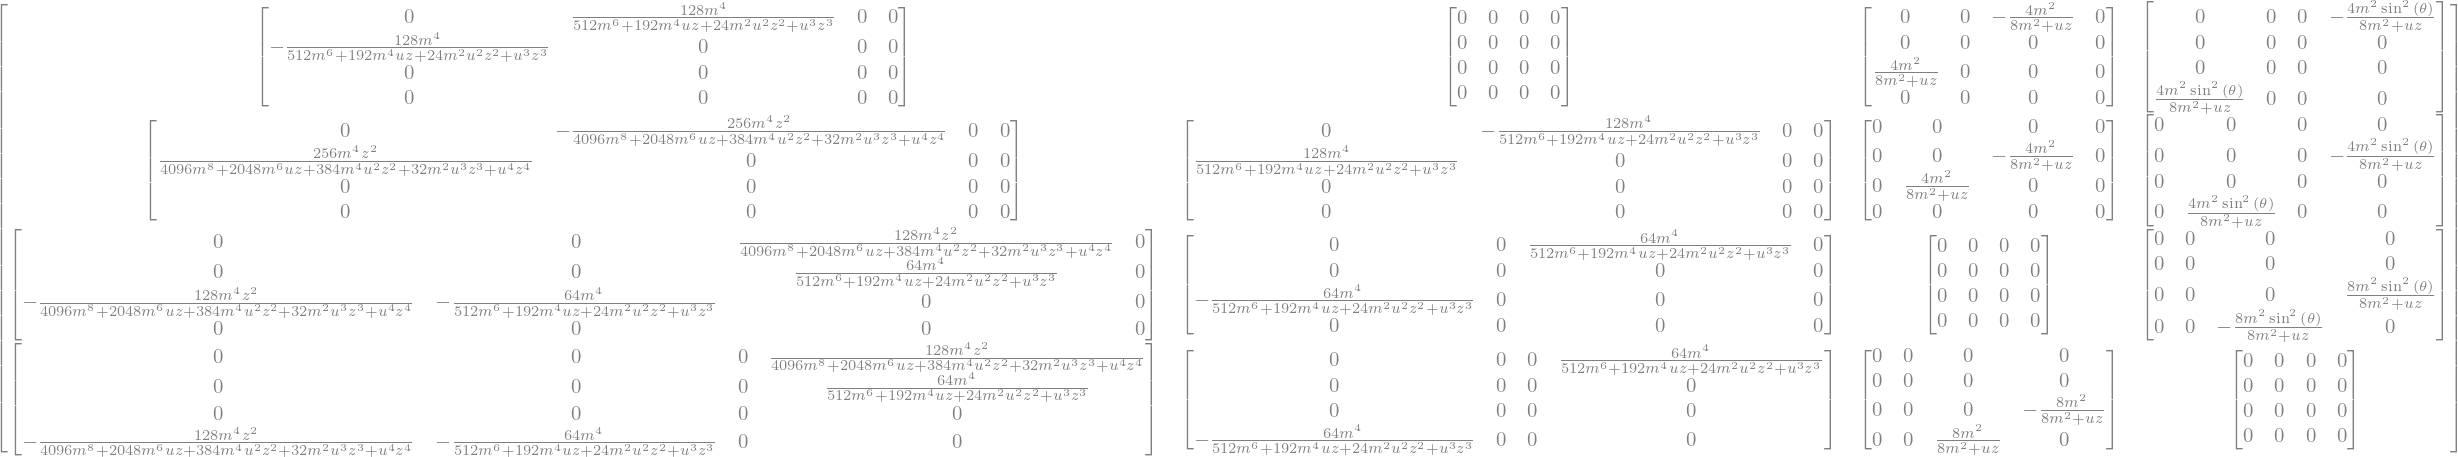

In [7]:
# what is the Rienmann tensor?
riem = RiemannCurvatureTensor.from_metric(sch)
riem.simplify()
riem.tensor() # all components!

In [21]:
# ###Plot something
# # first make the tensor into a function, printing 
# args, func = einst.tensor_lambdify()
# print(args) # these are the argument values 

# #Make x values - which we will sub in for r 
# x = np.arange(1.5, 20.0, 0.04)
# func(0.5,x,0, 0, 1, 1, 1)[0][1]

# # Call the functions
# y = func(1.0,x,1, 1, 1, 1, 1)[0][1]
# z = -func(1.0,x,1, 1, 1, 1, 1)[0][0] # 0.1 to bring scale in
# fig=plt.figure()
# ax=fig.add_axes([0,2,1.0,1.0])
# ax.plot(x,y)
# ax.plot(x,z)
# ax.set_title("T_01")


